In [2]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [4]:
# Paths for data.
Ravdess = "D:/audio_detection/datasets/ravdess/audio_speech_actors_01-24/"
Crema = "D:/audio_detection/datasets/crema/AudioWAV/"
Tess = "D:/audio_detection/datasets/tess/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "D:/audio_detection/datasets/savee/ALL/"

In [5]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

C:\Users\INFO\AppData\Local\Temp\ipykernel_11952\800787859.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


,Emotions,Path
0,neutral,D:/audio_detection/datasets/ravdess/audio_spee...
1,neutral,D:/audio_detection/datasets/ravdess/audio_spee...
2,neutral,D:/audio_detection/datasets/ravdess/audio_spee...
3,neutral,D:/audio_detection/datasets/ravdess/audio_spee...
4,calm,D:/audio_detection/datasets/ravdess/audio_spee...


In [6]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,D:/audio_detection/datasets/crema/AudioWAV/100...
1,disgust,D:/audio_detection/datasets/crema/AudioWAV/100...
2,fear,D:/audio_detection/datasets/crema/AudioWAV/100...
3,happy,D:/audio_detection/datasets/crema/AudioWAV/100...
4,neutral,D:/audio_detection/datasets/crema/AudioWAV/100...


In [7]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,D:/audio_detection/datasets/tess/TESS Toronto ...
1,angry,D:/audio_detection/datasets/tess/TESS Toronto ...
2,angry,D:/audio_detection/datasets/tess/TESS Toronto ...
3,angry,D:/audio_detection/datasets/tess/TESS Toronto ...
4,angry,D:/audio_detection/datasets/tess/TESS Toronto ...


In [8]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,D:/audio_detection/datasets/savee/ALL/DC_a01.wav
1,angry,D:/audio_detection/datasets/savee/ALL/DC_a02.wav
2,angry,D:/audio_detection/datasets/savee/ALL/DC_a03.wav
3,angry,D:/audio_detection/datasets/savee/ALL/DC_a04.wav
4,angry,D:/audio_detection/datasets/savee/ALL/DC_a05.wav


In [10]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("datasets/data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,D:/audio_detection/datasets/ravdess/audio_spee...
1,neutral,D:/audio_detection/datasets/ravdess/audio_spee...
2,neutral,D:/audio_detection/datasets/ravdess/audio_spee...
3,neutral,D:/audio_detection/datasets/ravdess/audio_spee...
4,calm,D:/audio_detection/datasets/ravdess/audio_spee...


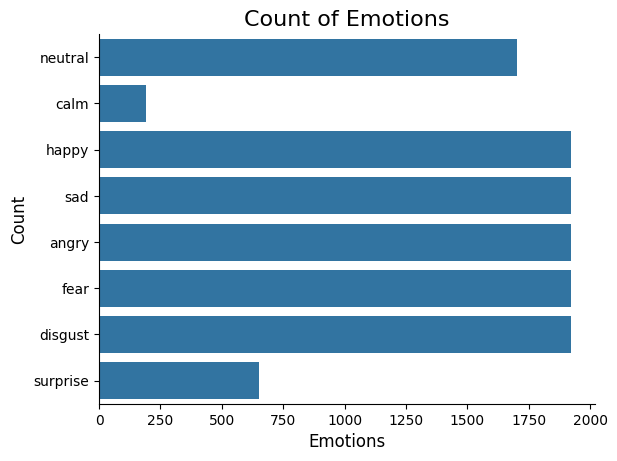

In [11]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [14]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

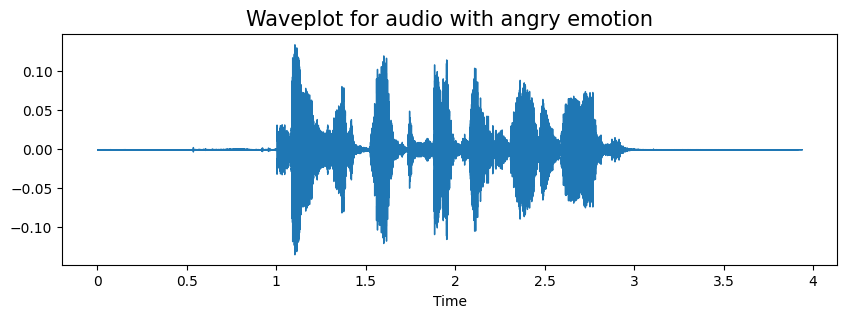

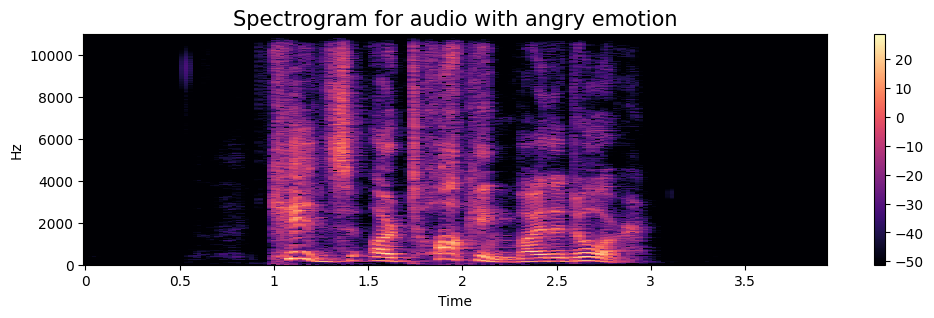

In [15]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

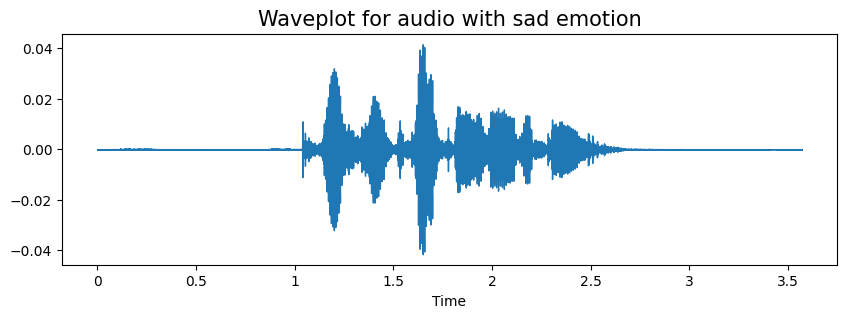

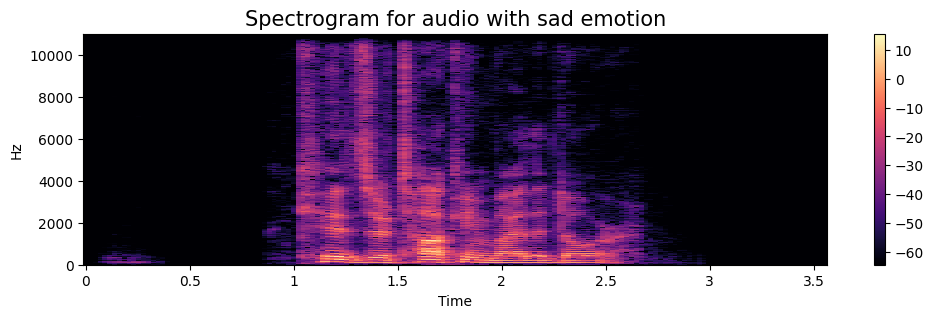

In [16]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

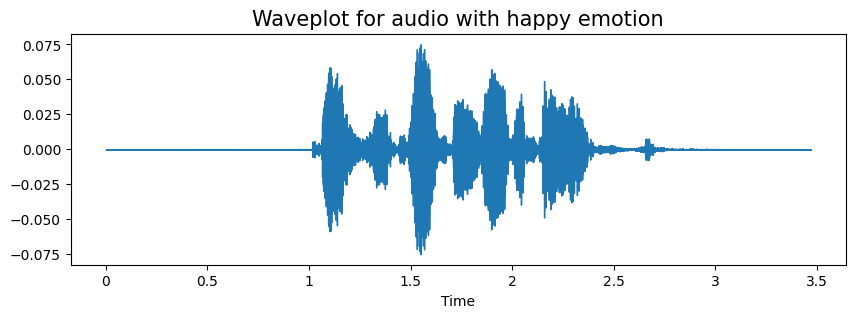

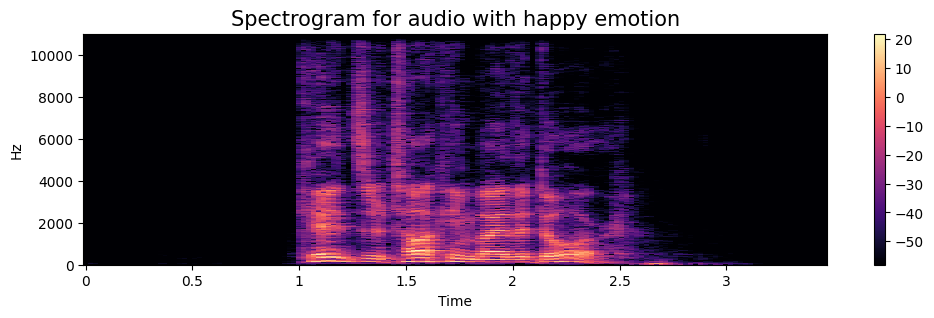

In [17]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [7]:
import speech_recognition as sr
from langdetect import detect


def detect_language(text):
    """
    Détecte la langue d'un texte donné.
    :param text: Texte transcrit.
    :return: Code de langue (ex. : "fr", "en").
    """
    try:
        language = detect(text)
        return language
    except Exception as e:
        return f"Erreur lors de la détection : {e}"


def speech_to_text_auto_language(file_path):
    """
    Convertit un fichier audio en texte en détectant automatiquement la langue.
    :param file_path: Chemin du fichier audio (.wav, .flac, etc.)
    :return: Texte transcrit avec la langue détectée ou un message d'erreur.
    """
    recognizer = sr.Recognizer()
    try:
        with sr.AudioFile(file_path) as source:
            print("Chargement de l'audio...")
            audio = recognizer.record(source)  # Lire tout l'audio
            print("Conversion en texte...")
            
            # Essayez de transcrire en anglais
            text = recognizer.recognize_google(audio, language="en-US")
            detected_lang = detect(text)
            
            if detected_lang == "fr":
                # Si la langue détectée est française, re-transcrire avec la langue française
                print("La langue détectée est le français, re-transcription...")
                text = recognizer.recognize_google(audio, language="fr-FR")
            
            print(f"Langue détectée : {detected_lang}")
            return text
    except sr.UnknownValueError:
        return "Impossible de comprendre l'audio."
    except sr.RequestError as e:
        return f"Erreur avec le service de reconnaissance vocale : {e}"
    except Exception as e:
        return f"Erreur : {e}"






In [4]:
file_path = "D:/audio_detection/datasets/savee/ALL/DC_a06.wav"  # Remplacez par le chemin de votre fichier
print("Transcription automatique avec détection de la langue :")
text = speech_to_text_auto_language(file_path)
print("Texte transcrit :", text)

Transcription automatique avec détection de la langue :
Chargement de l'audio...
Conversion en texte...
Langue détectée : en
Texte transcrit : Korean trash play tag with beach balls for hours


In [3]:
from transformers import pipeline

def load_emotion_model():
    """
    Charge le modèle pré-entraîné pour la classification des émotions.
    :return: Un pipeline Hugging Face prêt pour les prédictions.
    """
    print("Téléchargement du modèle...")
    model_name = "j-hartmann/emotion-english-distilroberta-base"
    emotion_pipeline = pipeline("text-classification", model=model_name)
    print("Modèle chargé avec succès.")
    return emotion_pipeline

def predict_emotion(emotion_pipeline, text):
    """
    Prédit l'émotion dominante pour un texte donné.
    :param emotion_pipeline: Le pipeline de classification d'émotions.
    :param text: Texte à analyser.
    :return: Résultat de la prédiction.
    """
    print(f"Analyse du texte : {text}")
    result = emotion_pipeline(text)
    return result

def predict_emotions_batch(emotion_pipeline, texts):
    """
    Prédit les émotions dominantes pour une liste de textes.
    :param emotion_pipeline: Le pipeline de classification d'émotions.
    :param texts: Liste de textes à analyser.
    :return: Résultats des prédictions.
    """
    print(f"Analyse des textes : {texts}")
    results = emotion_pipeline(texts)
    return results


d:\audio_detection\audio\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def speech_to_text_real_time_auto_language(emotion_pipeline):
    """
    Capture la parole en temps réel via le microphone, transcrit le texte et prédit l'émotion.
    :param emotion_pipeline: Pipeline Hugging Face pour la classification des émotions.
    """
    recognizer = sr.Recognizer()

    # Utiliser le microphone comme source
    with sr.Microphone() as source:
        print("Ajustement au bruit ambiant... Patientez.")
        recognizer.adjust_for_ambient_noise(source)
        print("Parlez maintenant ! Dites 'stop' pour quitter.")

        while True:
            try:
                # Capturer l'audio
                print("\nÉcoute...")
                audio = recognizer.listen(source)

                # Transcrire l'audio en texte
                try:
                    text = recognizer.recognize_google(audio, language='en-US')  # Transcription en anglais
                    print(f"Vous avez dit : {text}")
                    
                    # Condition d'arrêt : si l'utilisateur dit "stop", quitter la boucle
                    if text.lower() == "stop":
                        print("Arrêt demandé. Fin de l'écoute.")
                        break

                    # Prédire l'émotion
                    print("Prédiction de l'émotion...")
                    result = emotion_pipeline(text)
                    print("Résultat de la prédiction :", result)

                except sr.UnknownValueError:
                    print("Je n'ai pas compris ce que vous avez dit.")
                except sr.RequestError as e:
                    print(f"Erreur du service : {e}")

            except KeyboardInterrupt:
                print("Arrêt manuel.")
                break

In [7]:
# Charger le modèle
emotion_pipeline = load_emotion_model()

    # Prédire une seule émotion
text = "I am feeling so happy today!"
result = predict_emotion(emotion_pipeline, text)
print("Résultat :", result)

print("\n")

    # Prédire des émotions pour plusieurs textes
texts = [
        "I am so excited about the new project!",
        "I feel sad and tired today.",
        "This is absolutely amazing!",
        "Why does everything always go wrong with me?"
    ]
results = predict_emotions_batch(emotion_pipeline, texts)
for t, res in zip(texts, results):
        print(f"Texte : {t}")
        print(f"Résultat : {res}")

Téléchargement du modèle...

Modèle chargé avec succès.
Analyse du texte : I am feeling so happy today!
Résultat : [{'label': 'joy', 'score': 0.9923168420791626}]


Analyse des textes : ['I am so excited about the new project!', 'I feel sad and tired today.', 'This is absolutely amazing!', 'Why does everything always go wrong with me?']
Texte : I am so excited about the new project!
Résultat : {'label': 'joy', 'score': 0.9757896661758423}
Texte : I feel sad and tired today.
Résultat : {'label': 'sadness', 'score': 0.9874016642570496}
Texte : This is absolutely amazing!
Résultat : {'label': 'surprise', 'score': 0.4901074171066284}
Texte : Why does everything always go wrong with me?
Résultat : {'label': 'fear', 'score': 0.3259957432746887}


In [8]:
emotion_pipeline = load_emotion_model()
speech_to_text_real_time_auto_language(emotion_pipeline)

Téléchargement du modèle...
Modèle chargé avec succès.
Ajustement au bruit ambiant... Patientez.
Parlez maintenant ! Dites 'stop' pour quitter.

Écoute...
Vous avez dit : I feel so happy
Prédiction de l'émotion...
Résultat de la prédiction : [{'label': 'joy', 'score': 0.9892314076423645}]

Écoute...
Vous avez dit : I am so scared
Prédiction de l'émotion...
Résultat de la prédiction : [{'label': 'fear', 'score': 0.9936416745185852}]

Écoute...
Je n'ai pas compris ce que vous avez dit.

Écoute...
Vous avez dit : I am not okay
Prédiction de l'émotion...
Résultat de la prédiction : [{'label': 'sadness', 'score': 0.8834397792816162}]

Écoute...
Vous avez dit : I want to go with my
Prédiction de l'émotion...
Résultat de la prédiction : [{'label': 'sadness', 'score': 0.9583964943885803}]

Écoute...
Je n'ai pas compris ce que vous avez dit.

Écoute...
Vous avez dit : lot of students so close
Prédiction de l'émotion...
Résultat de la prédiction : [{'label': 'surprise', 'score': 0.54702210426330